# Neural network regression with TensorFlow Exercises

##  1. Create own regression data and build a model on it.

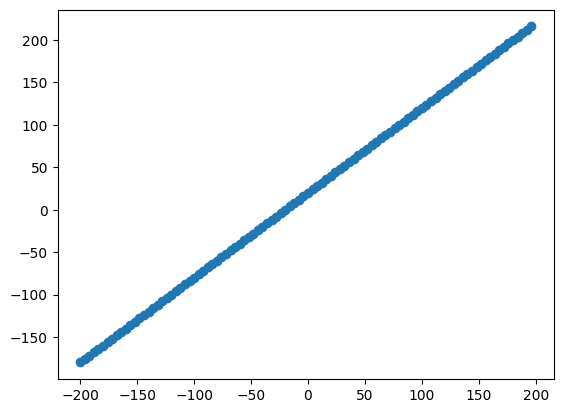

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


X = tf.range(-200 , 200, 4)
y = X + 20

# visualize it
plt.scatter(X, y)

In [2]:
# check the length of data
len(X)

100

In [3]:
# splitting data into training and test
X_train = X[:80]
X_test = X[80:]
y_train = y[:80]
y_test = y[80:]


## Building 3 models:
 * Model-1 : 1 layer with sgd optimizer 100 epochs
 * Model-2 : 2 layer with sgd optimizer 100 epochs
 * Model-3 : 1 layer with adam optimizer 100 epochs
 * Model-4 : 2 layer with adam/sgd optimizer 300 epochs

### **Model - 1** Build and Train
 * 1 Dense layer
 * SGD optimizer
 * 100 Epochs traning

In [4]:

# random seed
tf.random.set_seed(42)

# create a model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, name="input-output_layer")
],name="model_1")

# compile the model
model_1.compile(
    loss=tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.SGD(),
    metrics=["mae"]
)

# fit the model
history_1 = model_1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)


Epoch 1/100
3/3 [==============================] - 4s 14ms/step - loss: 97.4366 - mae: 97.4366
Epoch 2/100
3/3 [==============================] - 0s 8ms/step - loss: 24.7431 - mae: 24.7431
Epoch 3/100
3/3 [==============================] - 0s 6ms/step - loss: 35.9631 - mae: 35.9631
Epoch 4/100
3/3 [==============================] - 0s 6ms/step - loss: 40.1096 - mae: 40.1096
Epoch 5/100
3/3 [==============================] - 0s 6ms/step - loss: 36.2276 - mae: 36.2276
Epoch 6/100
3/3 [==============================] - 0s 7ms/step - loss: 28.0082 - mae: 28.0082
Epoch 7/100
3/3 [==============================] - 0s 6ms/step - loss: 35.8820 - mae: 35.8820
Epoch 8/100
3/3 [==============================] - 0s 6ms/step - loss: 38.3140 - mae: 38.3140
Epoch 9/100
3/3 [==============================] - 0s 6ms/step - loss: 31.8978 - mae: 31.8978
Epoch 10/100
3/3 [==============================] - 0s 6ms/step - loss: 41.3821 - mae: 41.3821
Epoch 11/100
3/3 [==============================] - 0s 7ms

#### Visualize model, data and prediction

In [5]:
# creating function to check performance
def performance(history):
  return pd.DataFrame(history.history).plot()
  return plt.ylabel("loss")
  return plt.xlabel("epochs")

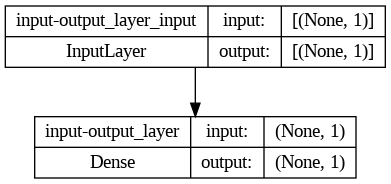

In [6]:
# visualize model
from tensorflow.keras.utils import plot_model

plot_model(model=model_1, show_shapes=True)

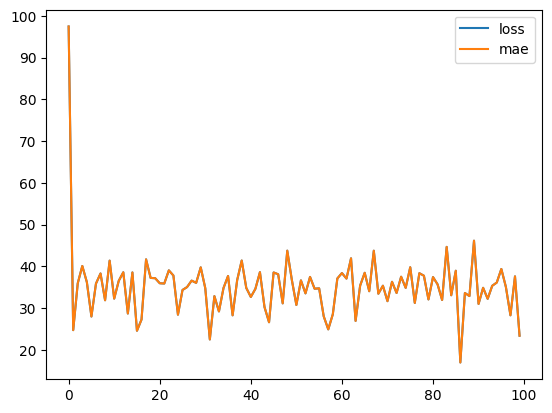

In [7]:
history1 = performance(history_1)

In [8]:
# summarize model
model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-output_layer (Dense)  (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


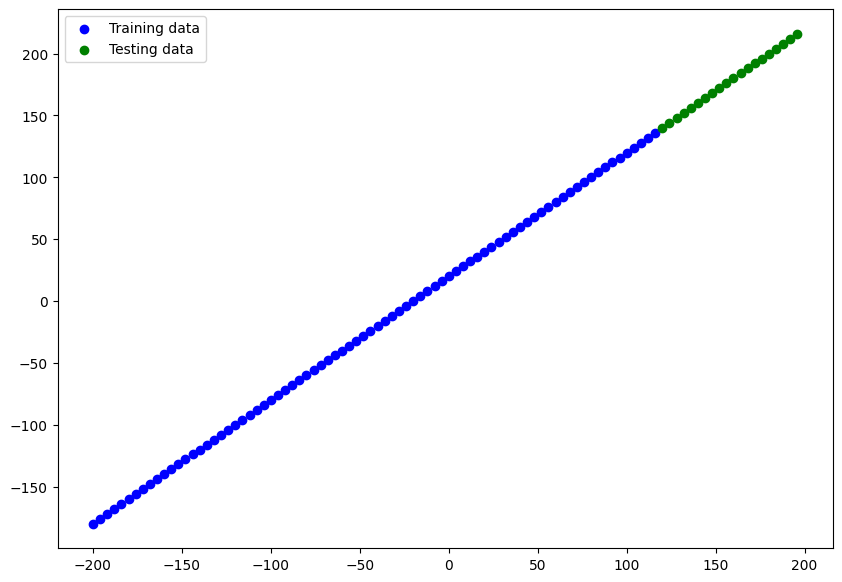

In [9]:
# Visualizing data
plt.figure(figsize=(10,7))

# Plotting train and test data
plt.scatter( X_train , y_train,  c="b", label="Training data")
plt.scatter(X_test, y_test, c="g", label="Testing data")
plt.legend()

In [10]:
# predict from model
y_pred = model_1.predict(X_test)
y_pred

1/1 [==============================] - 0s 66ms/step


array([[ 68.63365 ],
       [ 70.88371 ],
       [ 73.13377 ],
       [ 75.383835],
       [ 77.633896],
       [ 79.88395 ],
       [ 82.13401 ],
       [ 84.38407 ],
       [ 86.63413 ],
       [ 88.884186],
       [ 91.13425 ],
       [ 93.38431 ],
       [ 95.63437 ],
       [ 97.88443 ],
       [100.13448 ],
       [102.384544],
       [104.634605],
       [106.88467 ],
       [109.13473 ],
       [111.38478 ]], dtype=float32)

In [11]:
# creating plotting function
def plot_predictions(train_data=X_train,
                     train_label= y_train,
                     test_data= X_test,
                     test_labels= y_test,
                     predictions= y_pred):
  """
  Plots training data , test data and compares predictions to ground truth
  """
  plt.figure(figsize=(10,7))
  # plot training data in blue
  plt.scatter(train_data, train_label, c="b", label="Training data")
  # plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # plot predcitions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # show the legends
  plt.legend();

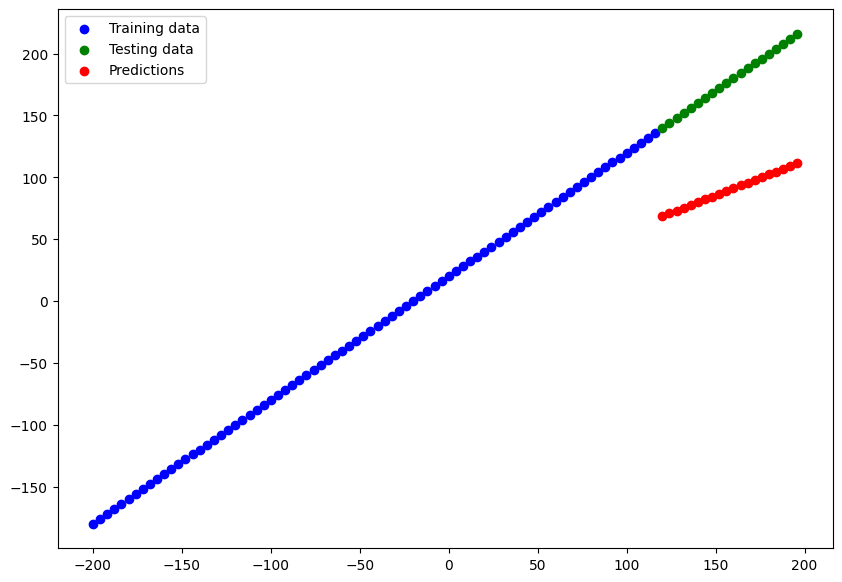

In [12]:
# visualize testing and predicted data
visualize1 = plot_predictions(predictions =y_pred)
visualize1


#### Evaluate model-1

In [14]:
# Evaluate model
evalute_model_1 = model_1.evaluate(X_test, y_test)
evalute_model_1

1/1 [==============================] - 0s 25ms/step - loss: 87.9908 - mae: 87.9908


[87.99078369140625, 87.99078369140625]

 Since we're working on a regression, two of the main metrics:
 * MAE - mean absolute error, "on average, how wrong is each of model's predictions"
 * MSE - mean square error, "square the average errors"

In [15]:
# creating MAE and MSE function
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true, y_pred= tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true, y_pred= tf.squeeze(y_pred))


In [16]:
# mse and mae for first model
mae1 = mae(y_test, y_pred)
mse1 = mse(y_test, y_pred)
mae1 , mse1

(<tf.Tensor: shape=(), dtype=float32, numpy=87.99078>,
 <tf.Tensor: shape=(), dtype=float32, numpy=7844.199>)

### **Model - 2** : Building and Train
 * 2 Dense layer
 * SGD optimizer
 * 100 epochs training

In [17]:
# create model
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="Model_2")

model_2.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

history_2 = model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 1s 7ms/step - loss: 74.9627 - mae: 74.9627
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 69.1233 - mae: 69.1233
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 63.8510 - mae: 63.8510
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 58.2934 - mae: 58.2934
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 52.8916 - mae: 52.8916
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 47.1931 - mae: 47.1931
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 41.7453 - mae: 41.7453
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 36.4297 - mae: 36.4297
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 30.8300 - mae: 30.8300
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 25.7302 - mae: 25.7302
Epoch 11/100
3/3 [==============================] - 0s 5ms/

#### Visualize Model and prediction

<Axes: >

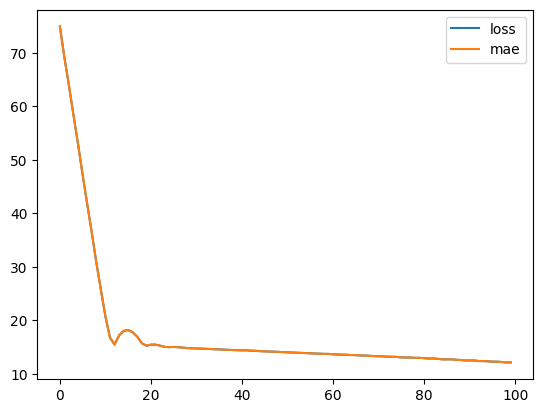

In [18]:
# visualize performance
performance(history_2)

In [19]:
model_2.summary()

Model: "Model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


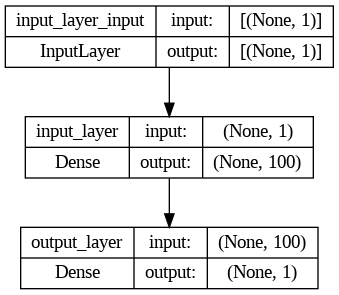

In [20]:
# visualize model
plot_model(model= model_2, show_shapes=True)

In [21]:
predict_2 = model_2.predict(X_test)
predict_2

1/1 [==============================] - 0s 43ms/step


array([[113.772026],
       [117.418304],
       [121.06458 ],
       [124.710884],
       [128.35713 ],
       [132.00342 ],
       [135.6497  ],
       [139.29599 ],
       [142.94228 ],
       [146.58856 ],
       [150.23482 ],
       [153.8811  ],
       [157.52739 ],
       [161.17368 ],
       [164.81996 ],
       [168.46623 ],
       [172.1125  ],
       [175.75877 ],
       [179.40509 ],
       [183.05136 ]], dtype=float32)

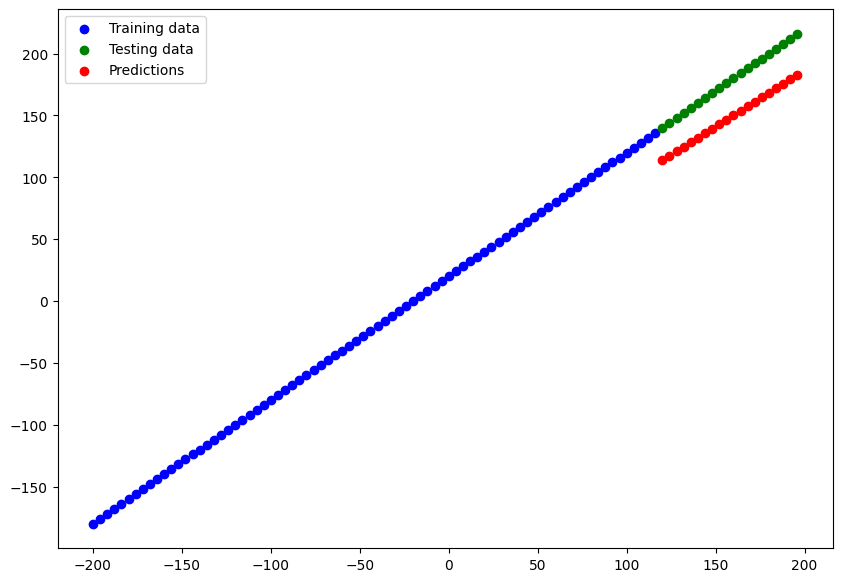

In [22]:
# plot data, prediction
visualize2 = plot_predictions(predictions=predict_2)

#### Evaluate model-2

In [23]:
# evaluate
evaluate_model2 = model_2.evaluate(X_test, y_test)

1/1 [==============================] - 0s 98ms/step - loss: 29.5883 - mae: 29.5883


In [24]:
# mse and mae
mae2 = mae(y_test, predict_2)
mse2 = mse(y_test, predict_2)
mse2, mae2

(<tf.Tensor: shape=(), dtype=float32, numpy=879.62823>,
 <tf.Tensor: shape=(), dtype=float32, numpy=29.588312>)

### **Model - 3**: Build and Train
 * 1 Dense layer
 * Adam optimizer
 * 100 epochs training

In [25]:
# create model
# set random seed
tf.random.set_seed(42)

# model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,name="hidden_layer")
], name="model_3")

# compile model
model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer= tf.keras.optimizers.legacy.Adam(),
    metrics=["mae"]
)

# fit model
history_3 = model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 7ms/step - loss: 26.9898 - mae: 26.9898
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 26.7592 - mae: 26.7592
Epoch 3/100
3/3 [==============================] - 0s 5ms/step - loss: 26.5549 - mae: 26.5549
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 26.3348 - mae: 26.3348
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 26.1254 - mae: 26.1254
Epoch 6/100
3/3 [==============================] - 0s 4ms/step - loss: 25.8949 - mae: 25.8949
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 25.6803 - mae: 25.6803
Epoch 8/100
3/3 [==============================] - 0s 4ms/step - loss: 25.4676 - mae: 25.4676
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 25.2413 - mae: 25.2413
Epoch 10/100
3/3 [==============================] - 0s 4ms/step - loss: 25.0304 - mae: 25.0304
Epoch 11/100
3/3 [==============================] - 0s 5ms/

#### Visualize Model and prediction


<Axes: >

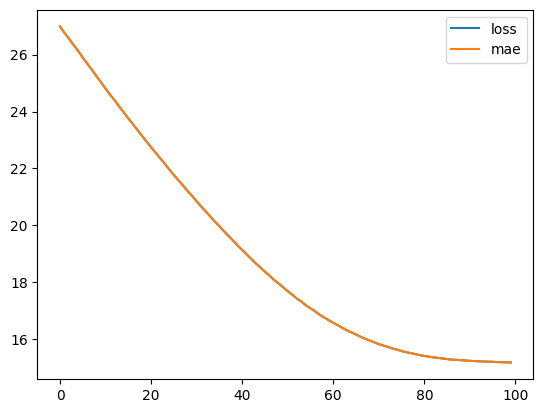

In [26]:
# visualize model
performance(history_3)

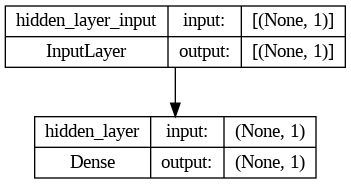

In [27]:
plot_model(model=model_3, show_shapes=True )

In [28]:
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
predict_3= model_3.predict(X_test)
predict_3

1/1 [==============================] - 0s 20ms/step


array([[105.72397 ],
       [109.23681 ],
       [112.74964 ],
       [116.262474],
       [119.775314],
       [123.28815 ],
       [126.80099 ],
       [130.31383 ],
       [133.82666 ],
       [137.3395  ],
       [140.85233 ],
       [144.36517 ],
       [147.878   ],
       [151.39084 ],
       [154.90367 ],
       [158.41652 ],
       [161.92935 ],
       [165.44218 ],
       [168.95502 ],
       [172.46785 ]], dtype=float32)

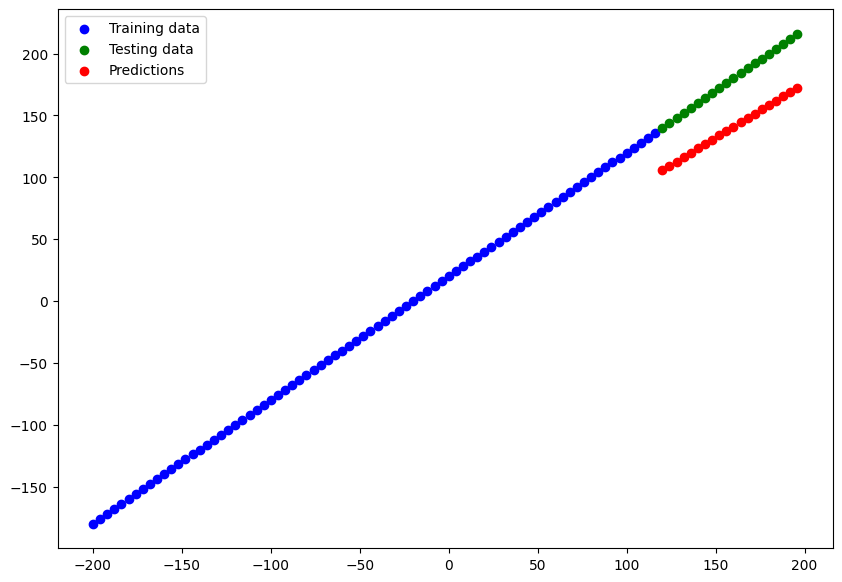

In [32]:
visualize_3 = plot_predictions(predictions=predict_3)

#### Evaluate model-3

In [33]:
evaluate_model3= model_3.evaluate(X_test, y_test)

1/1 [==============================] - 0s 99ms/step - loss: 38.9041 - mae: 38.9041


In [34]:
mse3 = mse(y_test, predict3)
mae3 = mae(y_test, predict3)
mse3, mae3

(<tf.Tensor: shape=(), dtype=float32, numpy=1521.4192>,
 <tf.Tensor: shape=(), dtype=float32, numpy=38.904083>)

### **Model - 4**  : Build and Train
 * 2 Dense layer
 * Adam optimizer
 * 300 epochs training

In [35]:

tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, name="hidden_layer1"),
    tf.keras.layers.Dense(50, name="hidden_layer2"),
    tf.keras.layers.Dense(1, name="last_layer")
],name="model_4")

model_4.compile(
    loss="mae",
    optimizer= tf.keras.optimizers.legacy.Adam(),
    metrics="mae"
)

history_4 = model_4.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
3/3 [==============================] - 0s 7ms/step - loss: 92.9025 - mae: 92.9025
Epoch 2/100
3/3 [==============================] - 0s 5ms/step - loss: 59.2884 - mae: 59.2884
Epoch 3/100
3/3 [==============================] - 0s 4ms/step - loss: 29.6943 - mae: 29.6943
Epoch 4/100
3/3 [==============================] - 0s 5ms/step - loss: 19.5820 - mae: 19.5820
Epoch 5/100
3/3 [==============================] - 0s 5ms/step - loss: 27.1933 - mae: 27.1933
Epoch 6/100
3/3 [==============================] - 0s 5ms/step - loss: 28.9099 - mae: 28.9099
Epoch 7/100
3/3 [==============================] - 0s 5ms/step - loss: 25.1962 - mae: 25.1962
Epoch 8/100
3/3 [==============================] - 0s 5ms/step - loss: 19.7111 - mae: 19.7111
Epoch 9/100
3/3 [==============================] - 0s 5ms/step - loss: 16.9438 - mae: 16.9438
Epoch 10/100
3/3 [==============================] - 0s 5ms/step - loss: 19.4236 - mae: 19.4236
Epoch 11/100
3/3 [==============================] - 0s 5ms/

#### Visualize model and predictions

<Axes: >

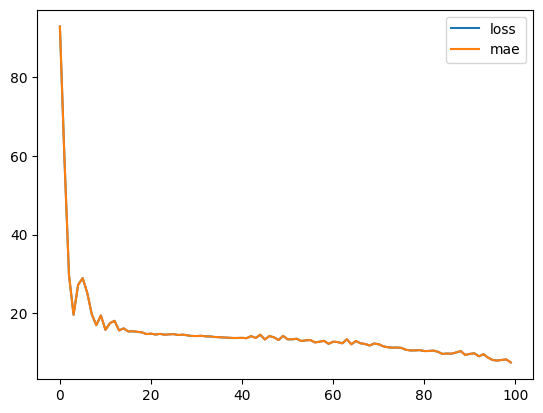

In [36]:
# visualizing model
performance(history_4)

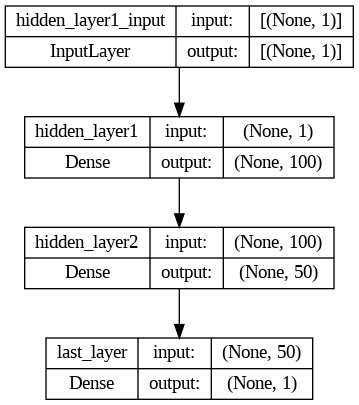

In [37]:
plot_model(model=model_4, show_shapes=True)

In [38]:
predict4 = model_4.predict(X_test)
predict4

1/1 [==============================] - 0s 51ms/step


array([[123.83908],
       [127.60386],
       [131.36862],
       [135.1334 ],
       [138.89818],
       [142.66296],
       [146.42775],
       [150.19254],
       [153.95729],
       [157.72209],
       [161.48685],
       [165.25166],
       [169.0164 ],
       [172.78119],
       [176.54596],
       [180.31075],
       [184.07553],
       [187.8403 ],
       [191.60509],
       [195.36987]], dtype=float32)

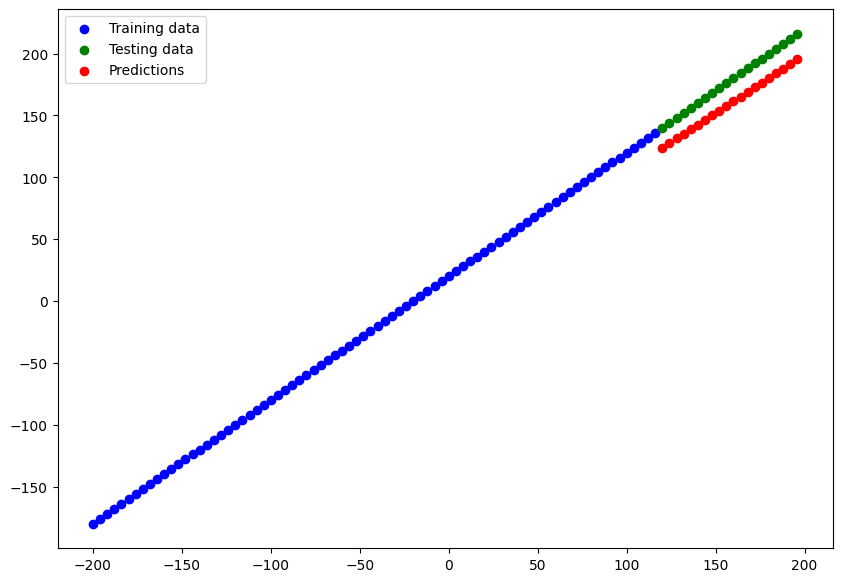

In [39]:
# visualize prediction
plot_predictions(predictions=predict4)

#### Evaluate model-4

In [40]:
evaluate_model4 = model_4.evaluate(X_test, y_test)

1/1 [==============================] - 0s 113ms/step - loss: 18.3955 - mae: 18.3955


In [41]:
#mae and mse
mae4 = mae(y_test, predict4)
mse4 = mse(y_test, predict4)
mae4, mse4

(<tf.Tensor: shape=(), dtype=float32, numpy=18.395529>,
 <tf.Tensor: shape=(), dtype=float32, numpy=340.2353>)

### **Comparing Model**
 * comapare visuals and mae/mse

(<Axes: >, <Axes: >, <Axes: >, <Axes: >)

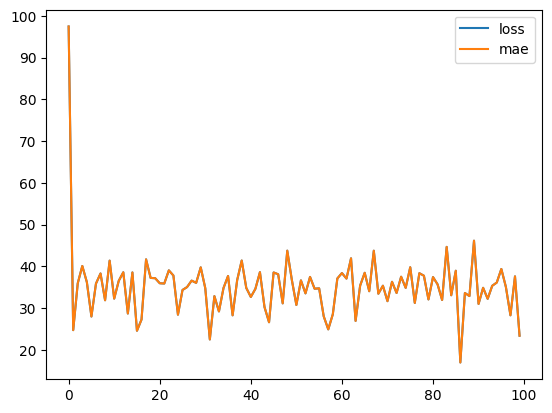

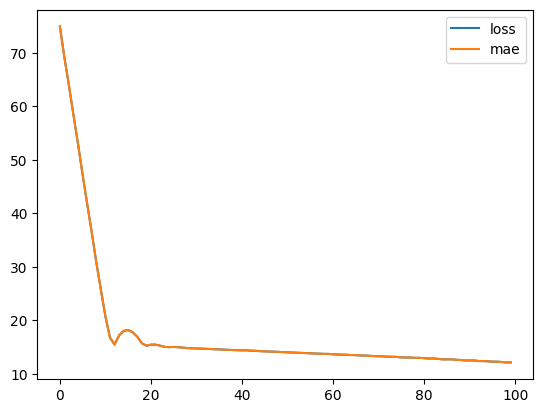

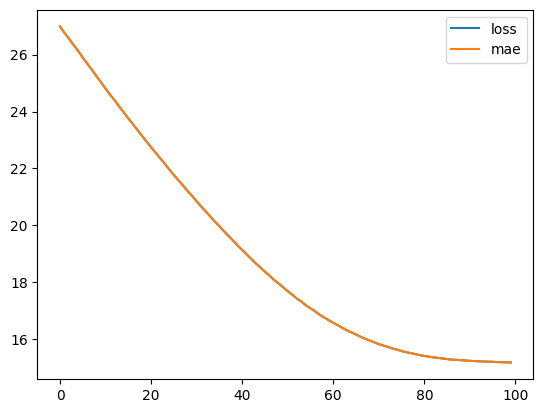

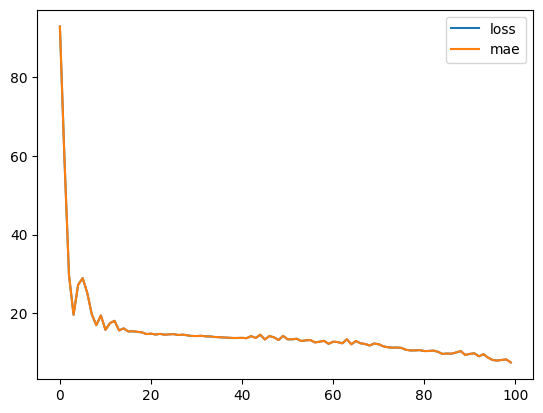

In [42]:
# compare visuals
performance(history_1) , performance(history_2), performance(history_3), performance(history_4)

In [43]:
model_results = [["model_1", mae1.numpy(), mse1.numpy()],
                 ["model_2",  mae2.numpy(), mse2.numpy()],
                 ["model_3",  mae3.numpy(), mse3.numpy()],
                 ["model_4",  mae4.numpy(), mse4.numpy()]]

results = pd.DataFrame(model_results, columns=["Model", "MAE", "MSE"])
results

,Model,MAE,MSE
0,model_1,87.990784,7844.199219
1,model_2,29.588312,879.628235
2,model_3,38.904083,1521.419189
3,model_4,18.395529,340.235291


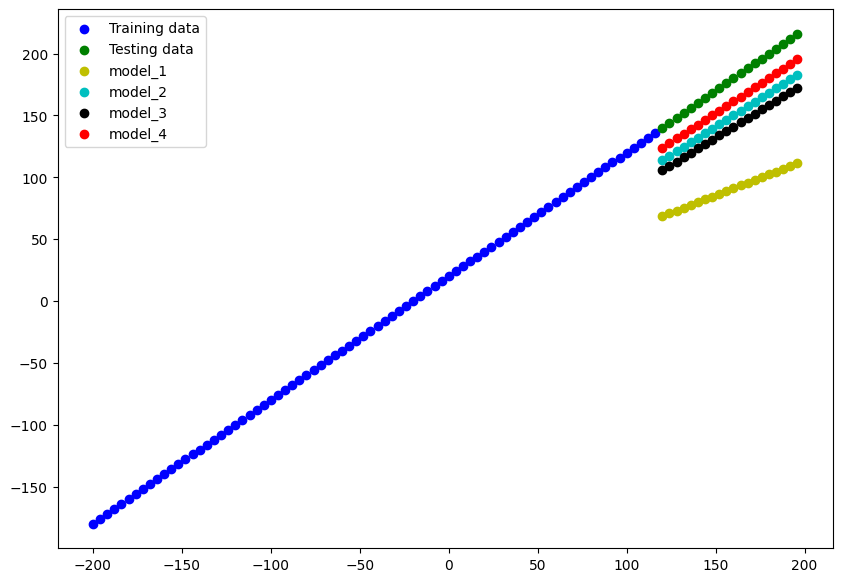

In [44]:
"""
   Plots training data , test data and compares predictions to ground truth
"""

plt.figure(figsize=(10,7))
# plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# plot testing data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# plot predcitions of model1 in yellow
plt.scatter(X_test, y_pred, c="y", label="model_1")
# plot prediction of model2 in cyan
plt.scatter(X_test, predict_2, c="c", label="model_2" )
# plot predction of model3 in black
plt.scatter(X_test, predict3, c="k", label="model_3")
# plot predcition of model4 in red
plt.scatter(X_test, predict4, c="r", label="model_4")
# show the legends
plt.legend()

# 2. Building a larger model .
  * Increasing layer
  * Increasing neurons in layer
  * Optimizing through optimizers
  * Increasing epochs

Importing Insurance Data and libraries

## Get the data

In [46]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# read data and see
insurance =  pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [47]:
insurance.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## Splitting and Preprocessing Data

In [48]:
# split data in x and y
X = insurance.drop(["charges"], axis=1)
y = insurance["charges"]

# create column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),# turn all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# spliting to training and test
X_train , X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

# fit the column transformer to training data
ct.fit(X_train)

# transform training and test data with normaliztion(MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)


In [49]:
X_train_normal, X_test_normal

(array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
         1.        ],
        [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
         1.        ]]),
 array([[0.58695652, 0.24791499, 0.4       , ..., 0.        , 0.        ,
         0.        ],
        [0.39130435, 0.37826204, 0.        , ..., 1.        , 0.        ,
         0.        ],
        [1.        , 0.29391983, 0.        , ..., 1.        , 0.        ,
         0.        ],
        ...,
        [0.43478261, 0.32458972, 0.2       , ..., 0.        , 0.        ,
         0.        ],
        [0.7

## Creating Model

In [50]:
# random seed
tf.random.set_seed(42)

# creating model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
],name= "insurance_model")

# compile the  model
insurance_model.compile(
    loss="mae",
    optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.1),
    metrics=["mae"]
)

# stoppping early
# early_stopping = tf.keras.callbacks.EarlyStopping(monitor="loss" , patience=3)

# fit the model
history = insurance_model.fit(X_train_normal, y_train, epochs=100 )

Epoch 1/100
34/34 [==============================] - 0s 3ms/step - loss: 9239.5869 - mae: 9239.5869
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 4650.6880 - mae: 4650.6880
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 3698.7185 - mae: 3698.7185
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 3642.9551 - mae: 3642.9551
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 3672.3918 - mae: 3672.3918
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 3707.6265 - mae: 3707.6265
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 3703.9355 - mae: 3703.9355
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 3618.9045 - mae: 3618.9045
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 3642.3621 - mae: 3642.3621
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 3642.1147 - mae: 3642.1147

Text(0, 0.5, 'loss')

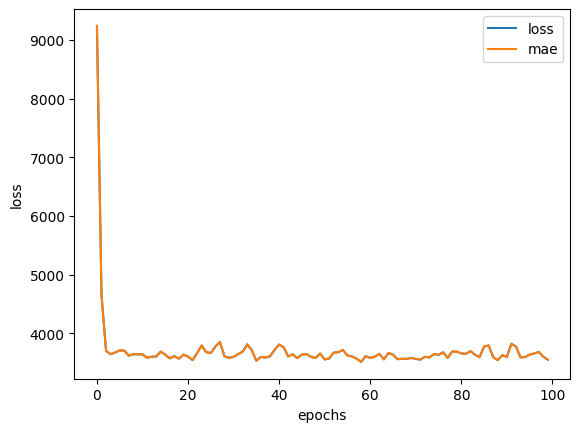

In [51]:
pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("loss")